<a href="https://colab.research.google.com/github/riyanakade/Breast-Cancer-Detection/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
# data visualization
import seaborn as sns
from sklearn import metrics
import sklearn.linear_model as LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline



In [ ]:
# read in the data and check the first 5 rows
df = pd.read_csv('/content/breast_cancer_dataframe.csv', index_col=0)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# general summary of the dataframe to check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# check the data type of each column
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [ ]:
Benign = df[df['target'] == 1]
Malignant = df[df['target'] == 0]


Total Number of target values = 569
Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


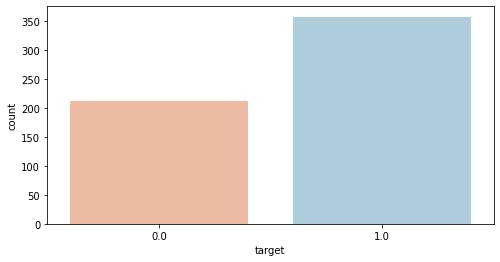

In [ ]:
# visualize distribution of classes 
#Our target variable,  is categorical and has two classes, 'B' (Benign) and 'M' (Malignant).
plt.figure(figsize=(8, 4))
sns.countplot(df['target'], palette='RdBu')

# count number of obvs in each class

print("Total Number of target values =", len(df))
benign, malignant = df['target'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

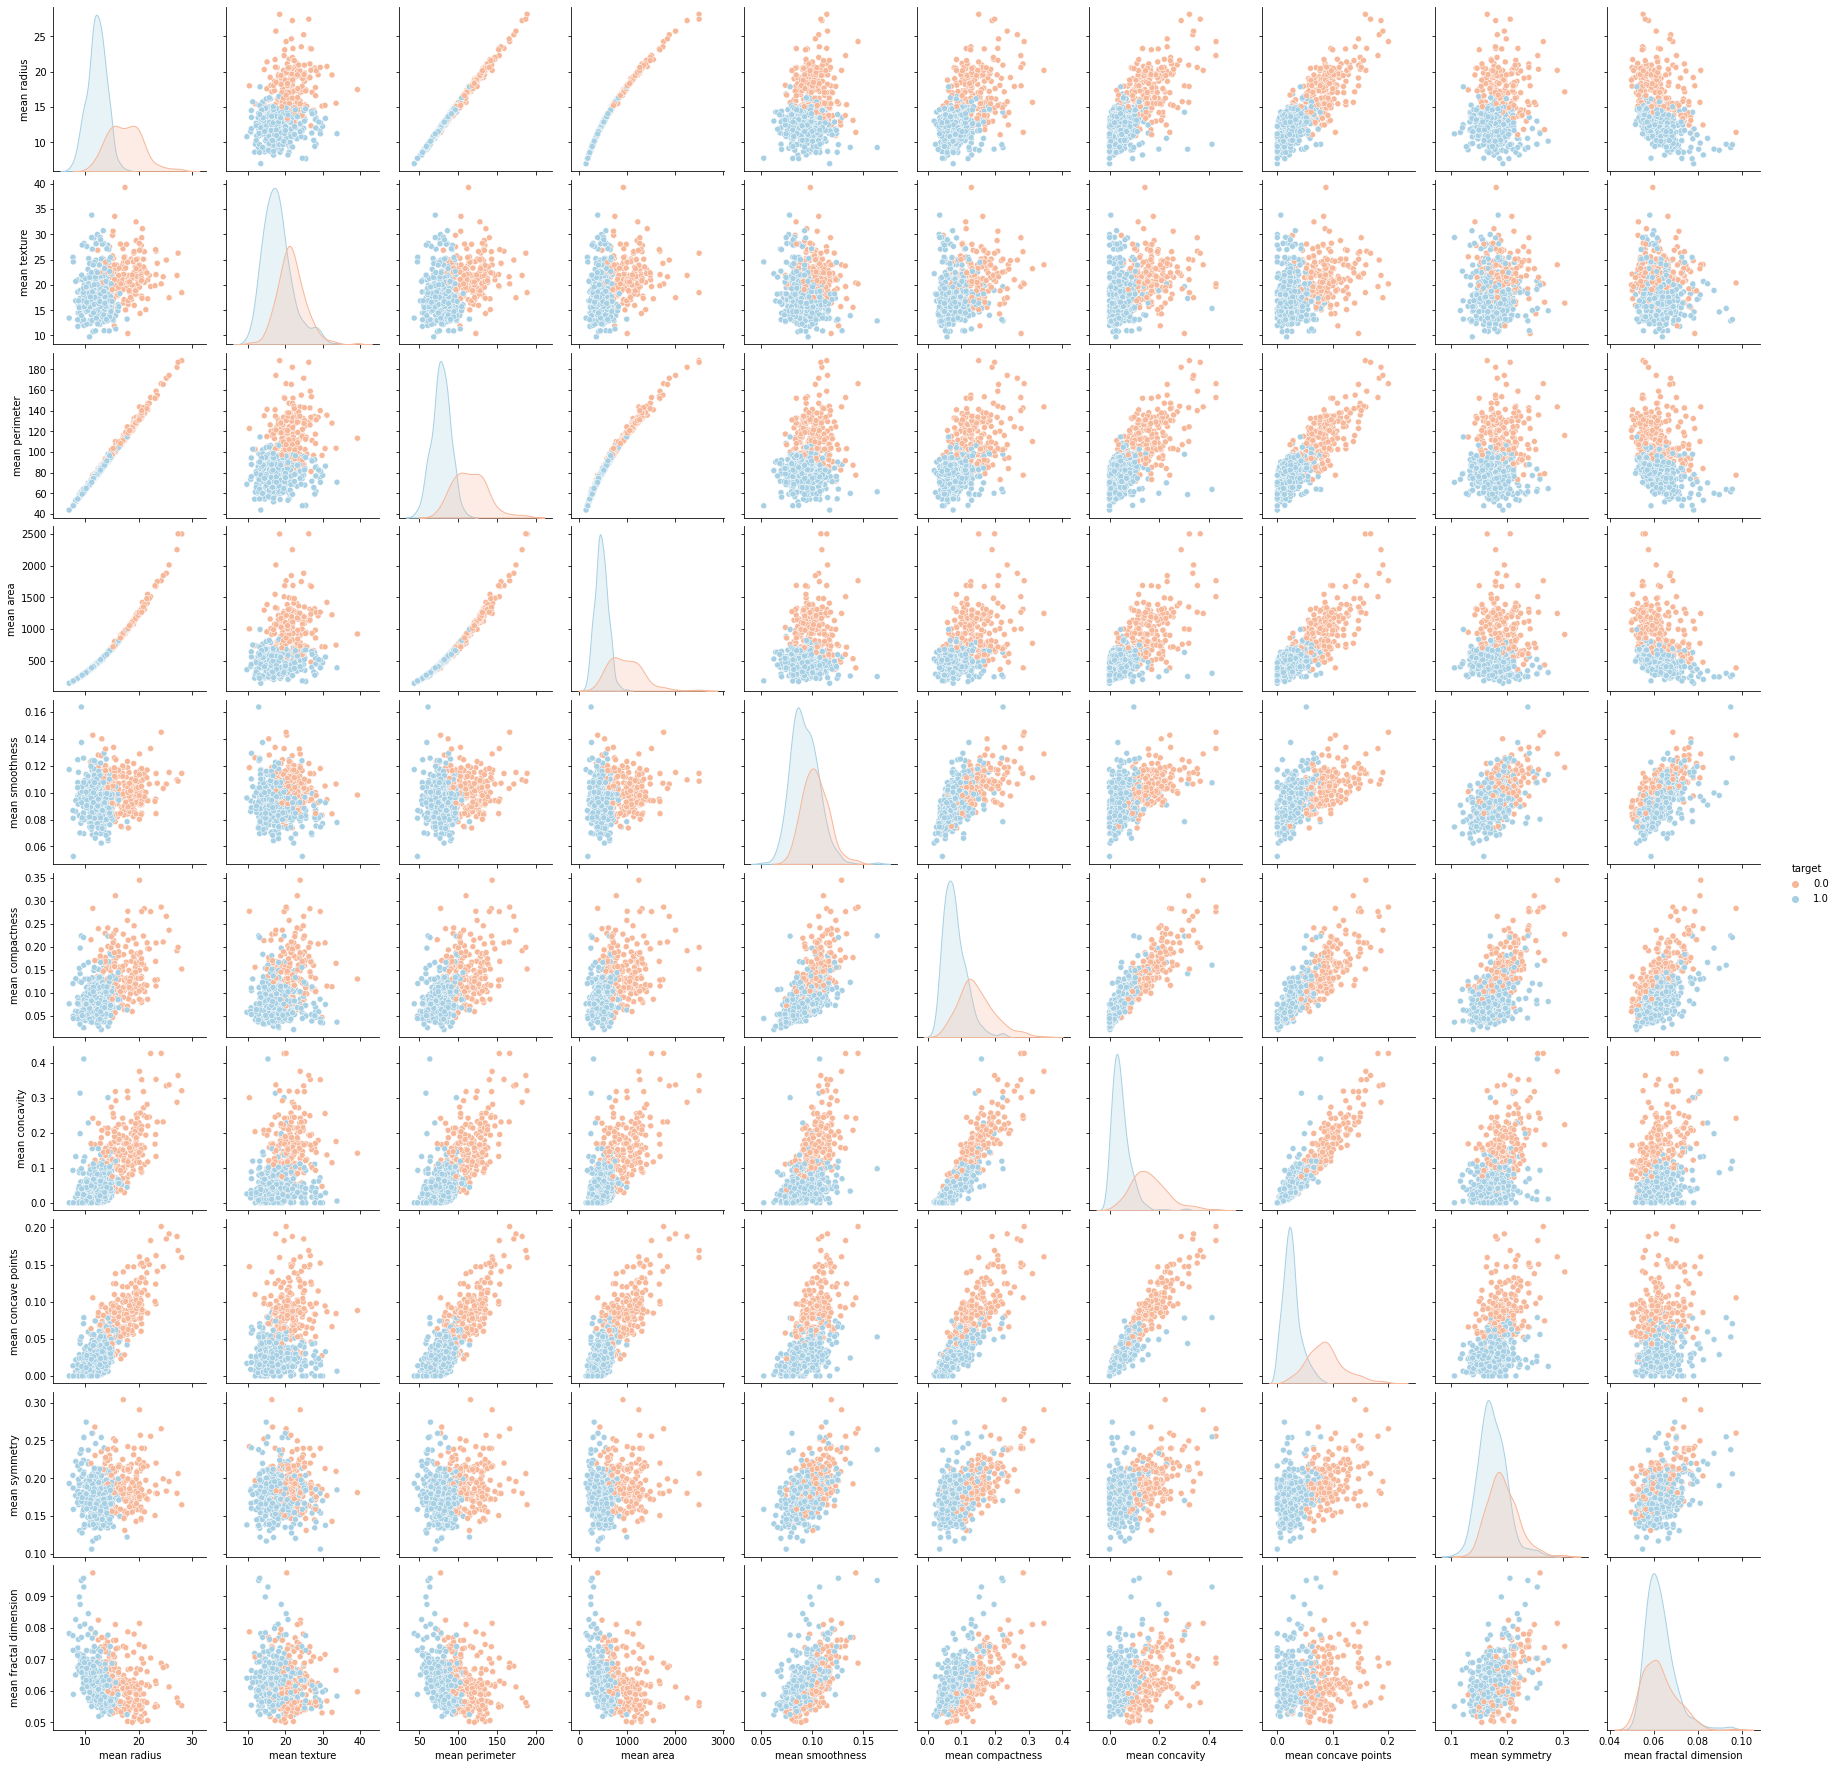

In [ ]:
#Although our dataset has 29 columns excluding the id and the target columns, they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst").

#In this analyze the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the target variable by only choosing the "mean" columns.

#scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:

cols = ['target',
        'mean radius', 
        'mean texture', 
        'mean perimeter', 
        'mean area', 
        'mean smoothness', 
        'mean compactness', 
        'mean concavity',
        'mean concave points', 
        'mean symmetry', 
        'mean fractal dimension']

sns.pairplot(data=df[cols], hue='target', palette='RdBu')




In [ ]:
#Feature Matrix 
X= df.drop('target',axis=1) 
y= df['target']



In [ ]:
# Splitting the dataset into training and testing data in the ratio 80:20.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [ ]:
# Checking the Correlation between our training data features  
X_train.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.316083,0.998185,0.987094,0.164226,0.508985,0.669625,0.823662,0.130193,-0.330992,0.687831,-0.133134,0.684132,0.736629,-0.233293,0.174817,0.134351,0.337090,-0.131112,-0.050336,0.969537,0.281647,0.966220,0.941185,0.116935,0.403744,0.511501,0.736397,0.149669,-0.004484
mean texture,0.316083,1.000000,0.322445,0.318626,-0.023107,0.241977,0.298975,0.292473,0.064376,-0.071964,0.274250,0.391945,0.279962,0.258296,0.005236,0.187780,0.115727,0.138461,-0.011331,0.045517,0.349677,0.908182,0.354636,0.348051,0.093454,0.273151,0.298302,0.289088,0.098803,0.115940
mean perimeter,0.998185,0.322445,1.000000,0.986692,0.197597,0.555299,0.705993,0.850247,0.161548,-0.286012,0.699386,-0.122660,0.700160,0.745369,-0.212220,0.216026,0.164918,0.367159,-0.113737,-0.016077,0.969520,0.288406,0.970507,0.941920,0.145972,0.442236,0.545424,0.762361,0.171204,0.035518
mean area,0.987094,0.318626,0.986692,1.000000,0.170459,0.500276,0.679675,0.823160,0.131129,-0.302548,0.741652,-0.095706,0.739008,0.802692,-0.173831,0.182002,0.152064,0.334977,-0.097331,-0.029255,0.961717,0.276386,0.959382,0.958527,0.120212,0.380076,0.498019,0.712975,0.126243,-0.008425
mean smoothness,0.164226,-0.023107,0.197597,0.170459,1.000000,0.643792,0.503715,0.540170,0.536098,0.569111,0.291174,0.078002,0.281436,0.237709,0.361200,0.296529,0.219063,0.371415,0.190091,0.277729,0.202340,0.039730,0.222953,0.196480,0.800811,0.454826,0.418035,0.491856,0.374436,0.487641
mean compactness,0.508985,0.241977,0.555299,0.500276,0.643792,1.000000,0.879782,0.832933,0.583548,0.540311,0.490794,0.037658,0.523968,0.448349,0.164984,0.726166,0.534107,0.641033,0.188297,0.506778,0.537510,0.257121,0.583536,0.511644,0.577326,0.865480,0.818573,0.825494,0.501795,0.685937
mean concavity,0.669625,0.298975,0.705993,0.679675,0.503715,0.879782,1.000000,0.914627,0.477989,0.326375,0.630715,0.083288,0.648869,0.611714,0.113273,0.657862,0.667334,0.689313,0.148760,0.471887,0.679315,0.299400,0.713638,0.668894,0.442474,0.735011,0.880653,0.856157,0.387143,0.506538
mean concave points,0.823662,0.292473,0.850247,0.823160,0.540170,0.832933,0.914627,1.000000,0.443281,0.143624,0.698765,0.016334,0.706920,0.684406,0.039861,0.466464,0.386527,0.600496,0.066280,0.257497,0.829558,0.293345,0.852132,0.808452,0.447236,0.654748,0.739295,0.906312,0.358796,0.354534
mean symmetry,0.130193,0.064376,0.161548,0.131129,0.536098,0.583548,0.477989,0.443281,1.000000,0.460547,0.272369,0.116087,0.267812,0.195215,0.239717,0.421014,0.326318,0.408775,0.443154,0.350194,0.161466,0.075811,0.188754,0.152443,0.410912,0.454890,0.412594,0.418307,0.688489,0.429271
mean fractal dimension,-0.330992,-0.071964,-0.286012,-0.302548,0.569111,0.540311,0.326375,0.143624,0.460547,1.000000,-0.037154,0.184162,-0.012570,-0.116853,0.444301,0.556838,0.469985,0.357160,0.333950,0.687009,-0.276891,-0.037746,-0.237261,-0.254045,0.517432,0.451716,0.352917,0.168906,0.329159,0.771562


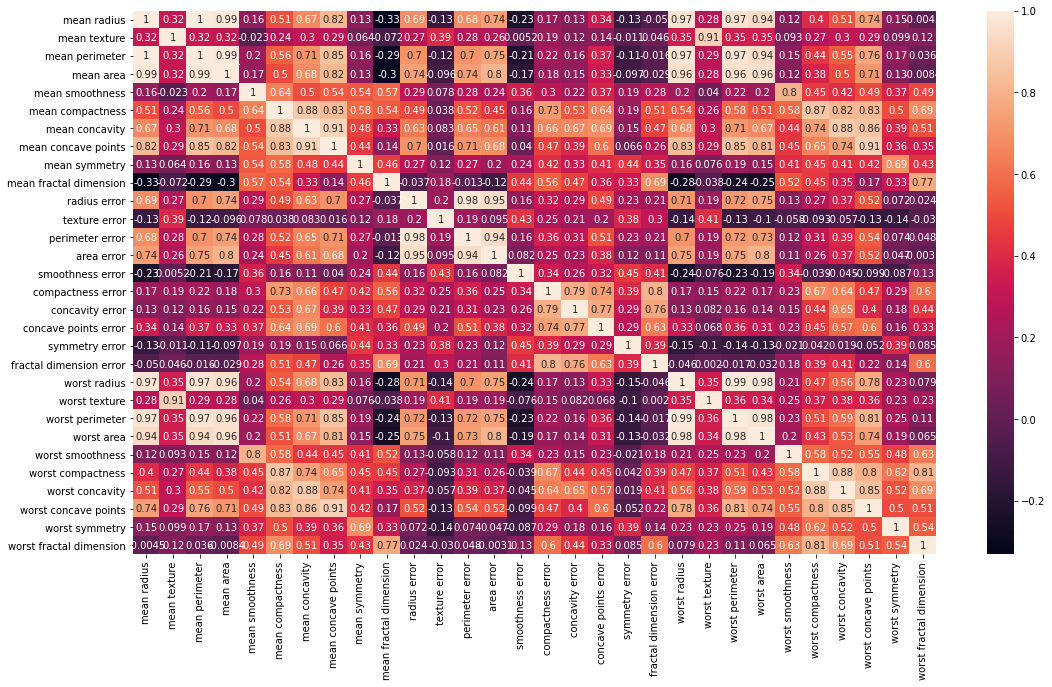

In [ ]:
# Plotting the correlation matrix as heatmap
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
# A User defined function to check the correlation between our dataset  attributes having parameters as dataset and threshold where threshold is the value of correlation that we desire between our training attributes.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
# Checking the Number of training attributes  that have correlation above 90%
corr_features = correlation(X_train, 0.90)
len(set(corr_features))

10

In [ ]:
# displaying the correlation features
corr_features

{'area error',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'perimeter error',
 'worst area',
 'worst concave points',
 'worst perimeter',
 'worst radius',
 'worst texture'}

In [ ]:
#  Droppping the correlated features thatare more than 90 perecent correlated to each other so that similar kind of features may be removed to reduce the dimentionality of our model  so that it could perform more accurately 
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension
512,13.40,20.52,0.11060,0.14690,0.14450,0.2116,0.07325,0.3906,0.9306,0.005414,0.022650,0.034520,0.013340,0.01705,0.004005,0.15740,0.38560,0.51060,0.3585,0.11090
457,13.21,25.25,0.08791,0.05205,0.02772,0.1619,0.05584,0.2084,1.3500,0.005768,0.008082,0.015100,0.006451,0.01347,0.001828,0.12890,0.10630,0.13900,0.2444,0.06788
439,14.02,15.66,0.07966,0.05581,0.02087,0.1589,0.05586,0.2142,0.6549,0.004837,0.009238,0.009213,0.010760,0.01171,0.002104,0.10340,0.10170,0.06260,0.2136,0.06710
298,14.26,18.17,0.06576,0.05220,0.02475,0.1635,0.05586,0.2300,0.6690,0.003169,0.013770,0.010790,0.005243,0.01103,0.001957,0.09445,0.21670,0.15650,0.2636,0.07676
37,13.03,18.42,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,0.09701,0.04619,0.04833,0.1987,0.06169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,17.42,25.56,0.10060,0.11460,0.16820,0.1308,0.05866,0.5296,1.6670,0.031130,0.085550,0.143800,0.039270,0.02175,0.012560,0.12430,0.17930,0.28030,0.1603,0.06818
519,12.75,16.70,0.11250,0.11170,0.03880,0.2120,0.06623,0.3834,1.0030,0.007509,0.015610,0.019770,0.009199,0.01805,0.003629,0.14750,0.19790,0.14230,0.3071,0.08557
432,20.18,19.54,0.11330,0.14890,0.21330,0.1724,0.06053,0.4331,1.0010,0.009087,0.027150,0.055460,0.019100,0.02451,0.004005,0.16650,0.29420,0.53080,0.3032,0.08075
516,18.31,20.58,0.10680,0.12480,0.15690,0.1860,0.05941,0.5449,0.9225,0.006176,0.018770,0.029130,0.010460,0.01559,0.002725,0.14920,0.25360,0.37590,0.3074,0.07863


In [ ]:
# Implementing Logistic Regression Model

from sklearn.linear_model import LogisticRegression

In [ ]:
# Model Fitting and predictions
regression=LogisticRegression()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Calculating accuracy socre for logistic regression model
regression.score(X_test, y_test)


0.9473684210526315

            predicted_cancer  predicted_healthy
is_cancer                 45                  2
is_healthy                 4                 63


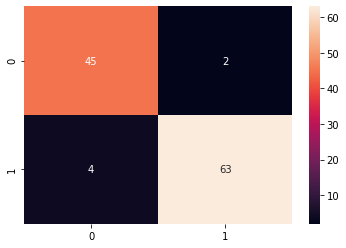

In [ ]:
# Computing Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)

sns.heatmap(cm, annot=True)


In [ ]:
#Computing Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        47
         1.0       0.97      0.94      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_new = clf.predict(X_test)

In [ ]:
# Computing Accuracy of decision tree
from sklearn.model_selection import cross_val_score
print(clf.score(X_test,y_test))

0.9122807017543859


            predicted_cancer  predicted_healthy
is_cancer                 45                  2
is_healthy                 8                 59


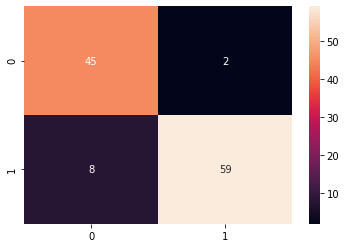

In [ ]:
# Computing confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_new)
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(cm, annot=True)


In [ ]:
# Computing classfification report
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        47
         1.0       0.97      0.88      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier

cf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
cf.fit(X_train,y_train)

y_pred1=cf.predict(X_test)

# Computing accuracy score for Random forest classifier Model
cf.score(X_test,y_test)



0.9736842105263158

            predicted_cancer  predicted_healthy
is_cancer                 46                  1
is_healthy                 2                 65


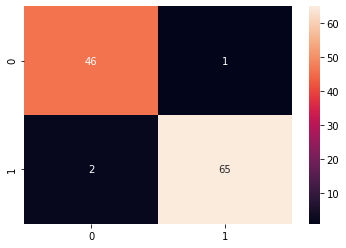

In [ ]:
# Computing confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred1)
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)

sns.heatmap(cm, annot=True)


In [ ]:
# Computing classfification report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        47
         1.0       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
!pip install xgboost

In [ ]:
# Train an XGBosst classifier model

import xgboost as xgb


model=xgb.XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred2=model.predict(X_test)

# Computing Accuracy of XGBoost model
model.score(X_test,y_test)

0.9736842105263158

            predicted_cancer  predicted_healthy
is_cancer                 45                  2
is_healthy                 1                 66


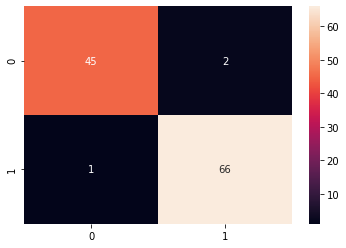

In [ ]:
# Computing confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred2)
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(cm, annot=True)


In [ ]:
# Computing classfification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
#SVM
from sklearn.preprocessing import StandardScaler  

#feature Scaling    
scaler= StandardScaler()    
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test)       

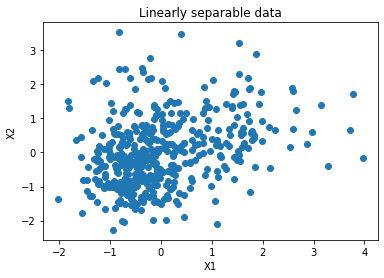

In [ ]:
# Generate scatter plot for training data 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

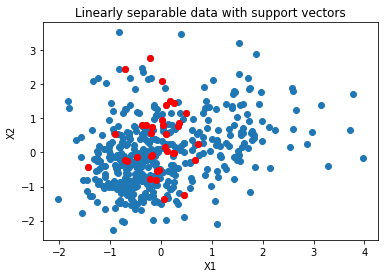

In [ ]:
# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
#Predicting the test set result  
y_pred3= classifier.predict(X_test)

#Accuracy
acc = accuracy_score(y_test,y_pred3)
print("Accuracy:",acc)

Accuracy: 0.9824561403508771


            predicted_cancer  predicted_healthy
is_cancer                 46                  1
is_healthy                 1                 66


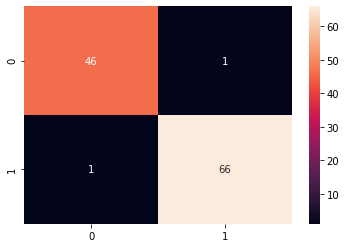

In [ ]:
#Creating the Confusion matrix  
    
#print(confusion_matrix(y_test, y_pred3))
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(cm, annot=True)


In [ ]:
# Computing Classification report 
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

